# Multi Layer Perceptron Example 
- need multiple layers for non-linearly seperable classes

### Imports
- Sequential allows for the creation of a model layer by laer
- Dense creates fully connected layers
- Adam optimizer is an extension to stochastic gradient descent in that it computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradient
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


### Functions
- **plotDecisionBoundary** creates a contour plot to easily visualize the decision boundary of the classifier

In [2]:
def plotDecisionBoundary(X,y, mdl):
    xSpan = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    ySpan = np.linspace(min(X[:,1])-1, max(X[:,0])+1)
    xx,yy = np.meshgrid(xSpan, ySpan)
    _xx,_yy = xx.ravel(), yy.ravel()
    grid = np.c_[_xx,_yy]
    pred = model.predict(grid)
    z = pred.reshape(xx.shape)
    plt.contourf(xx,yy,z)

### Generate a non-linearly separable dataset
- use sklearn datasets
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

In [3]:
numPoints = 500
X, y = datasets.make_circles(n_samples=numPoints, random_state=123, noise=.16, factor=.15)
print(X[0:5,:])
print(y[0:5])

[[ 0.59933176 -0.30308945]
 [-0.29928852  0.16693628]
 [-0.22542444  0.24708004]
 [ 0.07576725 -0.26904717]
 [-0.28339894  0.25932886]]
[0 1 1 1 1]


### Plot the dataseet
- separate them by label

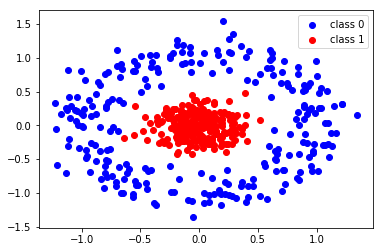

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red')
plt.legend(["class 0", "class 1"])
plt.show()

### Define the model
- too little nodes will result in a poor network
- too many nodes will result in overfitting
- input_shape is the number of input features
- two classes so use binary_crossentropy for back propagation
- metrics is used for evaluation https://keras.io/metrics/

In [5]:
model =  Sequential()
#hidden layer
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
#output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

### Train the network
- set verbose [0,4] which outputs fitting data as seen previously
- batch_size is determined by size of data and available system memory
- shuffle mixes data rows at each epoch
- model.fit returns a history object https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/


In [6]:
hist = model.fit(x=X, y=y, verbose=0, batch_size=50, epochs=100, shuffle='true')

### Visualize the model performance

dict_keys(['loss', 'acc'])


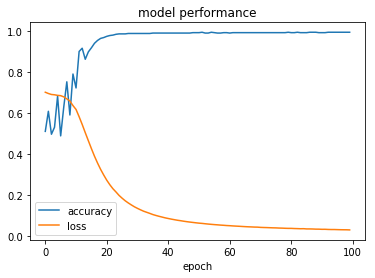

In [7]:
print(hist.history.keys())
plt.plot(hist.history['acc'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.title("model performance")
plt.xlabel("epoch")
plt.legend()
plt.show()

### Make predictions

In [35]:
class0 = np.array([[1.1, 0.0]])
pred0 = round(model.predict(class0)[0][0], 2)
class1 = np.array([[0.1, -.1]])
pred1 = round(model.predict(class1)[0][0], 2)
classQ = np.array([[.498, -.09]])
predQ = round(model.predict(classQ)[0][0], 2)
print(pred0)
print(pred1)
print(predQ)

0.01
1.0
0.5


### Plot the decision boundary

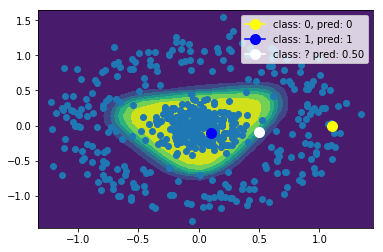

In [36]:
plotDecisionBoundary(X,y,model)
plt.scatter(X[:numPoints,0], X[:numPoints,1])
plt.scatter(X[numPoints:,0], X[numPoints:,1])
axes = plt.gca()
axes.set_ylim([X[:,1].min()-.1,X[:,1].max()+.1])
axes.set_xlim([X[:,0].min()-.1,X[:,0].max()+.1])
plt.plot(class0[0,0], class0[0,1], marker="o", markersize=10, color='yellow', label="class: 0, pred: %d" % pred0)
plt.plot(class1[0,0], class1[0,1], marker="o", markersize=10, color='blue', label="class: 1, pred: %d" % pred1)
plt.plot(classQ[0,0], classQ[0,1], marker="o", markersize=10, color='white', label="class: ? pred: %.2f" %predQ)
plt.legend()